# Construction of a Eutectic Phase Diagram

In this Notebook, we will put together tools to help us calculate the Gibbs free energy of materials and use the results to construct phase diagrams.

We will use a simple model for the Gibbs free energy of the solid (S) and liquid (L) phases and describe both by the regular solution model:
$$
\Delta G_\mathrm{mix}(x_B) = a_0 x_A x_B + RT \left [ x_B \ln x_B +(1−x_B) \ln(1−x_B) \right ].
$$
Here, $R$ is the gas constant (8.314 J/mol/K), $T$ the absolute temperature, $x_B$ is the mole fraction of component B.

For constructing the phase diagram, we need to account for the difference in the Gibbs free energy between the solid and liquid phases for the pure components A and B. We will use a simplified thermodynamics model for the pure components that assumes a that the difference in entropy and enthalpy between the solid and liquid does not depend on temperature.

We will then use the tangent intercept construction to determine the chemical potentials for the components A and B in each phase:
$$
\mu_A = G(x_B) - x_B \frac{dG(x_B)}{d x_B}
$$
and
$$
\mu_B = G(x_B) + (1-x_B) \frac{dG(x_B)}{d x_B}.
$$

In equilibrium, the chemical potentials of a every component are the same in each phase:
$$
\mu_A^S = \mu_A^L
$$
and
$$
\mu_B^S = \mu_B^L.
$$

The mathematical solution to the chemical equilibrium condition is the common tangent construction.


### Preliminaries
Import the units, numerical, and plotting packages.

In [1]:
# Import NumPy numerical package
import numpy as np

# Import SciPy
import scipy as scipy
from scipy.optimize import fsolve, newton

# Enable displaying of math output such as display(Math(r'Area: {}m^2 \\ Volume: {}m^3'.format(a, round(b,2), A, V)))
from IPython.display import display, Math

# Install the pint package using pip in the current Jupyter kernel
# To use pint, restart the kernel
import sys
!{sys.executable} -m pip install pint

# Disable Pint's old fallback behavior (must come before importing Pint)
import os
os.environ['PINT_ARRAY_PROTOCOL_FALLBACK'] = "0"

# Import Pint for units in Python
from pint import UnitRegistry
u = UnitRegistry(auto_reduce_dimensions=True)
u.default_format = 'P'

# plotting package
import matplotlib.pyplot as plt
%pylab inline
matplotlib.rcParams.update({'font.size': 24, 'text.usetex': False})

Populating the interactive namespace from numpy and matplotlib


### Thermodynamic data
Set the thermodynamic constant and define the thermodynamic functions for the regular solution model.

In [2]:
# Gas constant
R = 8.314*u.J/u.mol/u.K

# Return the ideal entropy of mixing as a function of temperature and mole fraction 
def get_S_id(T,x):
    S_id = -R * (x * np.log(x) + (1-x)*np.log(1-x))
    return S_id

# Return the enthalpy for a regular solution
def get_H_rs(T, a, x):
    H_rs = a * x * (1-x)
    return H_rs

# Return the Gibbs free energy of mixing for a regular solution
def get_G_rs(T, a, x):
    S_id = get_S_id(T,x)
    H_rs = get_H_rs(T, a, x)
    G_rs = H_rs - T * S_id
    return G_rs

### Gibbs free energy between the liquid and solid phase for the pure components A and B

We create a simple model for the difference in Gibbs free energy between the solid and liquid phase, $\Delta G^{S-L}$ for each pure component. We assume a constant entropy and enthalpy difference between the solid and liquid phase. Then the Gibbs free eneryg is linear in temperature.

**Question 1: For the choice of parameters selected below, what is the melting point of pure component A and pure component B?**

**Question 2: How would the melting point change if we increase the entropy of the liquid?**

Melting point
  of component A =  500.0 kelvin 
  of component B =  625.0 kelvin


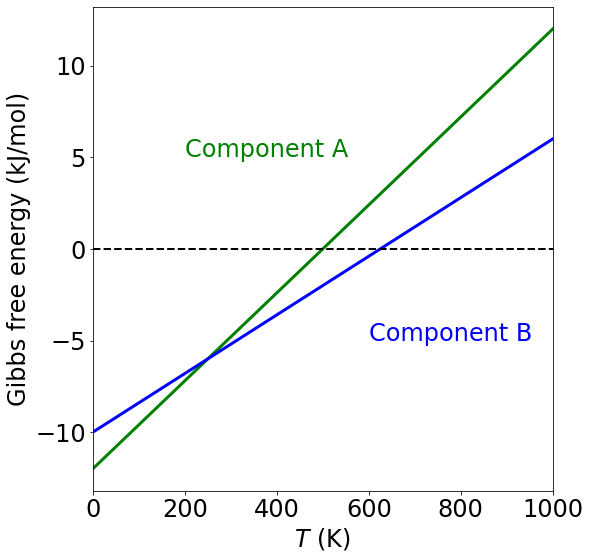

In [3]:
# Array of temperatures from 0 to 1000 K
Tv = np.linspace(0,1000,20)*u.K

# Difference in Gibbs free energy between the liquid and solid phase for the pure components A and B
# Assume that the Gibbs free energy difference is simply linear in temperature
def get_Gref(T, a, b):
    return a*T-b

# Select some reasonable parameters
def get_GrefA(T):
    return get_Gref(T, 24*u.J/u.mol/u.K, 12*u.kJ/u.mol)

def get_GrefB(T):
    return get_Gref(T, 16*u.J/u.mol/u.K, 10*u.kJ/u.mol)

GrefA = get_GrefA(Tv)
GrefB = get_GrefB(Tv)

# Calculate the melting point of pure component A and B
def get_GrefA_magnitude(T):
    Gref_value = get_Gref(T*u.K, 24*u.J/u.mol/u.K, 12*u.kJ/u.mol)
    return Gref_value.magnitude

def get_GrefB_magnitude(T):
    Gref_value = get_Gref(T*u.K, 16*u.J/u.mol/u.K, 10*u.kJ/u.mol)
    return Gref_value.magnitude

TmA = newton(get_GrefA_magnitude, 500)*u.K
TmB = newton(get_GrefB_magnitude, 500)*u.K
print("Melting point\n  of component A = ", TmA, "\n  of component B = ", TmB)

# Plot Gibbs free energy difference between the solid and liquid phase
# for the pure components A and B
fig, ax = plt.subplots(1, 1, figsize=(8,8))
fig.tight_layout()

ax.plot((Tv/(u.K)).magnitude, (GrefA/(u.kJ/u.mol)).magnitude, 'g-', linewidth=3.0)
ax.plot((Tv/(u.K)).magnitude, (GrefB/(u.kJ/u.mol)).magnitude, 'b-', linewidth=3.0)
ax.plot([0, 1000], [0, 0], 'k--', linewidth=2.0)

ax.annotate('Component A', xy=(200,5), color='g', xycoords='data')
ax.annotate('Component B', xy=(600,-5), color='b', xycoords='data')

ax.set_xlim([0, 1000])
ax.set_xlabel('$T$ (K)')
ax.set_ylabel('Gibbs free energy (kJ/mol)')

plt.show()

### Reference for the Gibbs free energies of the solid and liquid phase

Next, we use the regular solution model and the Gibbs free energy for the pure components to calculate the Gibbs free energy of the solid and liquid phases. The Gibbs free energy difference between the solid and liquid phase for the pure components A and B provides the correct references for the two Gibbs free energy curves. We select a temperature and plot the Gibbs free energy of the solid and liquid phases.

**Change the temperature and plot the Gibbs free energies of the solid and liquid phase.**

**Question 3: What do you observe for temperatures below the melting point of both phases?**

**Question 4: What do you observe for temperatures between the melting point of both phases?**

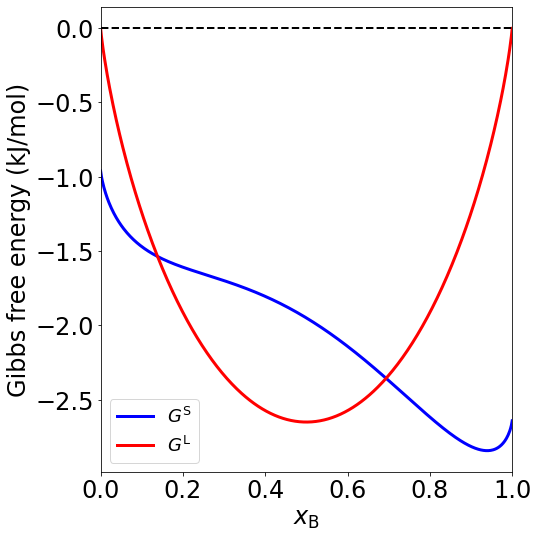

In [4]:
# Array of compositions from 0 to 1
xv = np.linspace(0.0001,0.9999,500)

# Set the temperature
T = 460*u.K

# Gibbs free energy of mixing for the regular solution model
a_S = 10*u.kJ/u.mol
a_L = 0*u.kJ/u.mol
Gmix_S = get_G_rs(T, a_S, xv)
Gmix_L = get_G_rs(T, a_L, xv)

# Reference Gibbs free energies for pure components
GrefA = get_GrefA(T)
GrefB = get_GrefB(T)

# Return the Gibbs free energy accounting for the reference states for A and B
# We select the liquid phase as the reference state for both pure components
def get_G_S(T, x):
    return get_G_rs(T, a_S, x) + get_GrefA(T)*(1-x) + get_GrefB(T)*x

def get_G_L(T, x):
    return get_G_rs(T, a_L, x)

G_S = get_G_S(T, xv)
G_L = get_G_L(T, xv)

# Plot Gibbs free energy for both phases
fig, ax = plt.subplots(1, 1, figsize=(8,8))
fig.tight_layout()

ax.plot(xv, (G_S/(u.kJ/u.mol)).magnitude, 'b-', linewidth=3.0, label='$G^\mathrm{S}$')
ax.plot(xv, (G_L/(u.kJ/u.mol)).magnitude, 'r-', linewidth=3.0, label='$G^\mathrm{L}$')
ax.plot([0, 1], [0, 0], 'k--', linewidth=2.0)
ax.set_xlim([0, 1])
ax.set_xlabel('$x_\mathrm{B}$')
ax.set_ylabel('Gibbs free energy (kJ/mol)')
ax.legend(prop={'size': 18})

fig.tight_layout()
plt.show()

The choice of reference state is arbitrary and does not change the thermodynamics. In the above example, we use the liquid phase as the reference state for pure component A and B. Hence, the Gibbs free energy of the liquid phase goes to zero for $x_B = 0$ and $x_B =1$.

**Question 5: If we want to change the reference state for pure component A to be the solid phase, how would you modify the equations for the Gibbs free energy of the solid and liquid mixture?**

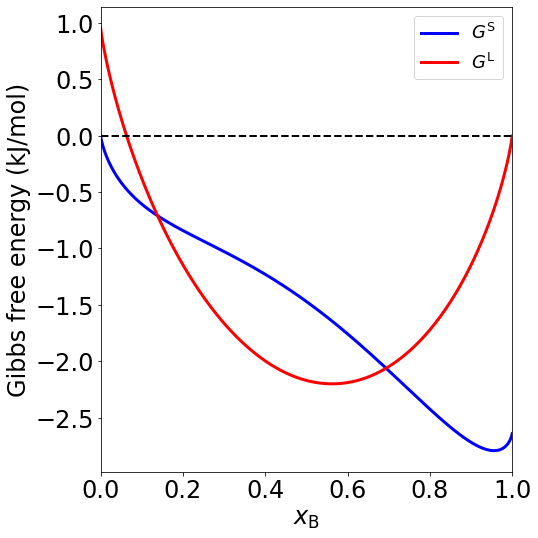

In [5]:
# Return the Gibbs free energy accounting for the reference states for A and B
# We select the liquid phase as the reference state for both pure components
def get_G_S(T, x):
    return get_G_rs(T, a_S, x) + get_GrefB(T)*x

def get_G_L(T, x):
    return get_G_rs(T, a_L, x) - get_GrefA(T)*(1-x) 

G_S = get_G_S(T, xv)
G_L = get_G_L(T, xv)

# Plot Gibbs free energy for both phases
fig, ax = plt.subplots(1, 1, figsize=(8,8))
fig.tight_layout()

ax.plot(xv, (G_S/(u.kJ/u.mol)).magnitude, 'b-', linewidth=3.0, label='$G^\mathrm{S}$')
ax.plot(xv, (G_L/(u.kJ/u.mol)).magnitude, 'r-', linewidth=3.0, label='$G^\mathrm{L}$')
ax.plot([0, 1], [0, 0], 'k--', linewidth=2.0)
ax.set_xlim([0, 1])
ax.set_xlabel('$x_\mathrm{B}$')
ax.set_ylabel('Gibbs free energy (kJ/mol)')
ax.legend(prop={'size': 18})

fig.tight_layout()
plt.show()

### Tangent intercept construction

Now we calculate the chemical potentials of components A and B for arbitrary mole fractions using the tangent intercept construction:
$$
\mu_A = G(x_B) - x_B \frac{dG(x_B)}{d x_B}
$$
and
$$
\mu_B = G(x_B) + (1-x_B) \frac{dG(x_B)}{d x_B}.
$$

**Question 6: Modify the code to calculate also the tangent for the solid phase and determine the chemical potentials of components A and B in the solid phase.**

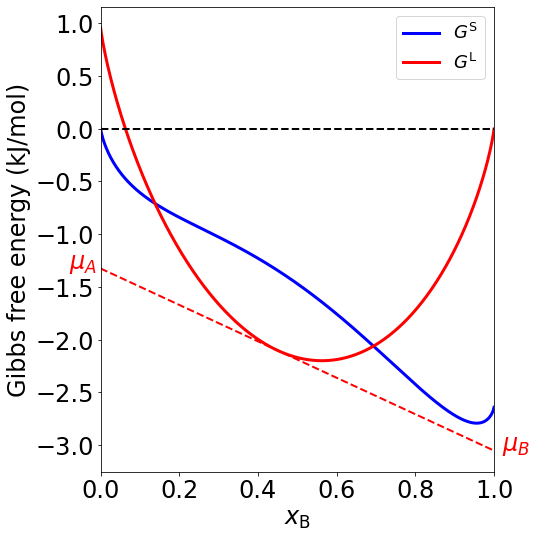

In [6]:
# Tangent to the Gibbs free energy curve

# Set the temperature
T = 460*u.K

G_S = get_G_S(T, xv)
G_L = get_G_L(T, xv)

# Tangent intercept construction of chemical potentials of components A and B

# Select a mole fraction
x = 0.45

# Calculate the derivative of G_L with respect to x
dx = 0.0001
dG_Ldx = (get_G_L(T, x+dx/2) - get_G_L(T, x-dx/2))/dx
mu_A = get_G_L(T, x) - x*dG_Ldx
mu_B = get_G_L(T, x) + (1-x)*dG_Ldx

# Plot Gibbs free energy for both phases
fig, ax = plt.subplots(1, 1, figsize=(8,8))
fig.tight_layout()

ax.plot(xv, (G_S/(u.kJ/u.mol)).magnitude, 'b-', linewidth=3.0, label='$G^\mathrm{S}$')
ax.plot(xv, (G_L/(u.kJ/u.mol)).magnitude, 'r-', linewidth=3.0, label='$G^\mathrm{L}$')
ax.plot([0, 1], [(mu_A/(u.kJ/u.mol)).magnitude, (mu_B/(u.kJ/u.mol)).magnitude], 'r--', linewidth=2.0)
ax.plot([0, 1], [0, 0], 'k--', linewidth=2.0)

ax.annotate('$\mu_A$', xy=(-0.08,(mu_A/(u.kJ/u.mol)).magnitude), color='r', xycoords='data', annotation_clip=False)
ax.annotate('$\mu_B$', xy=(1.02,(mu_B/(u.kJ/u.mol)).magnitude), color='r', xycoords='data', annotation_clip=False)

ax.set_xlim([0, 1])
ax.set_xlabel('$x_\mathrm{B}$')
ax.set_ylabel('Gibbs free energy (kJ/mol)')
ax.legend(prop={'size': 18})
fig.tight_layout()
plt.show()

### Calculate a common tangent

Finally, we will calculate the common tangent to determine the chemical equilibrium between the solid and liquid phase. We will use the Python function `fsolve` to determine the mole fraction $x_B$ in the solid and liquid phase such that the chemical potentials in each phase are equal:
$$
\mu_A^S = \mu_A^L
$$
and
$$
\mu_B^S = \mu_B^L.
$$

**Question 7: Calculate the equilibrium mole fractions in the solid and liquid phase for a range of temperatures and sketch out the phase diagram.**

Common tangent construction:


<IPython.core.display.Math object>

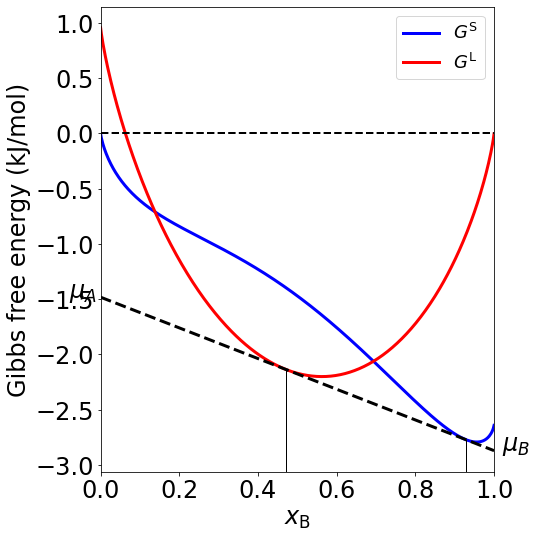

In [7]:
# Set the temperature
T = 460*u.K

G_S = get_G_S(T, xv)
G_L = get_G_L(T, xv)

# Return the chemical potentials of components A and B for the solid phase
def get_mu_S(T, x):
    dx = 0.0001
    dGdx = (get_G_S(T, x+dx/2) - get_G_S(T, x-dx/2))/dx
    mu_A = get_G_S(T, x) - x*dGdx
    mu_B = get_G_S(T, x) + (1-x)*dGdx
    return mu_A, mu_B

# Return the chemical potentials of components A and B for the liquid phase
def get_mu_L(T, x):
    dx = 0.0001
    dGdx = (get_G_L(T, x+dx/2) - get_G_L(T, x-dx/2))/dx
    mu_A = get_G_L(T, x) - x*dGdx
    mu_B = get_G_L(T, x) + (1-x)*dGdx
    return mu_A, mu_B

# Find the composition x such that mu_A^S = mu_A^L and mu_B^S = mu_B^L

def commontangent_solid_solid(p):
    x_S1, x_S2 = p
    mu_A_S1, mu_B_S1 = get_mu_S(T,x_S1)
    mu_A_S2, mu_B_S2 = get_mu_S(T,x_S2)
    return ((mu_A_S1-mu_A_S2).magnitude, (mu_B_S1-mu_B_S2).magnitude)

def commontangent_solid_liquid(p):
    x_S, x_L = p
    mu_A_S, mu_B_S = get_mu_S(T,x_S)
    mu_A_L, mu_B_L = get_mu_L(T,x_L)
    return ((mu_A_S-mu_A_L).magnitude, (mu_B_S-mu_B_L).magnitude)

# May need to ensure that we use a reasonable starting guess
x_S, x_L =  fsolve(commontangent_solid_liquid, (0.9, 0.5))

mu_A_S, mu_B_S = get_mu_S(T,x_S)
mu_A_L, mu_B_L = get_mu_L(T,x_L)

print('Common tangent construction:')
display(Math(r' x_S = {} \\ x_L = {}'.format(round(x_S,3), round(x_L,3))))

# Plot Gibbs free energy for both phases
fig, ax = plt.subplots(1, 1, figsize=(8,8))
fig.tight_layout()

ax.plot(xv, (G_S/(u.kJ/u.mol)).magnitude, 'b-', linewidth=3.0, label='$G^\mathrm{S}$')
ax.plot(xv, (G_L/(u.kJ/u.mol)).magnitude, 'r-', linewidth=3.0, label='$G^\mathrm{L}$')
ax.plot([0, 1], [(mu_A_S/(u.kJ/u.mol)).magnitude, (mu_B_S/(u.kJ/u.mol)).magnitude], 'k--', linewidth=3.0)
ax.plot([0, 1], [0, 0], 'k--', linewidth=2.0)

ax.annotate('$\mu_A$', xy=(-0.08,(mu_A_S/(u.kJ/u.mol)).magnitude), color='k', xycoords='data', annotation_clip=False)
ax.annotate('$\mu_B$', xy=(1.02,(mu_B_S/(u.kJ/u.mol)).magnitude), color='k', xycoords='data', annotation_clip=False)

ymin, ymax = ax.get_ylim()
ax.plot([x_S, x_S], [(get_G_S(T, x_S)/(u.kJ/u.mol)).magnitude, ymin], 'k-', linewidth=1.0)
ax.plot([x_L, x_L], [(get_G_L(T, x_L)/(u.kJ/u.mol)).magnitude, ymin], 'k-', linewidth=1.0)

ax.set_xlim([0, 1])
ax.set_ylim([ymin, ymax])
ax.set_xlabel('$x_\mathrm{B}$')
ax.set_ylabel('Gibbs free energy (kJ/mol)')
ax.legend(prop={'size': 18})
fig.tight_layout()
plt.show()

### Stable phases as a function of temperature

Next we will illustrate how we obtain the stable phases and their composition at three different temperatures.

At low temperatures, the stable phases will be the A-rich and B-rich solid phases, given by the Gibbs free energy of the regular solution model.

Common tangent construction:


<IPython.core.display.Math object>

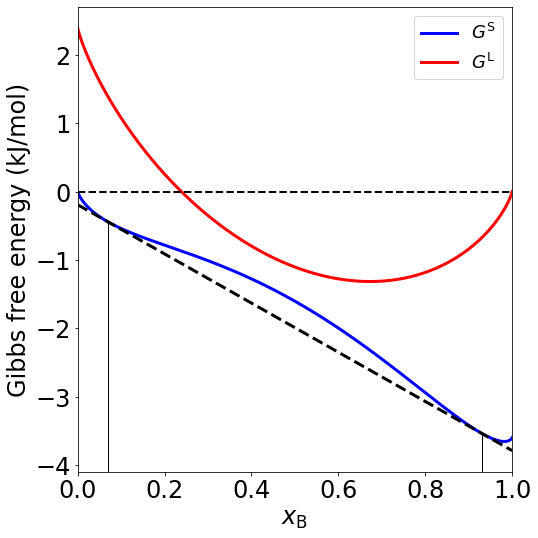

In [8]:
# Low temperature equilibrium between the A-rich and B-rich phases at T = 400K
T = 400*u.K

G_S = get_G_S(T, xv)
G_L = get_G_L(T, xv)

# May need to ensure that we use a reasonable starting guess
x_S1, x_S2 =  fsolve(commontangent_solid_solid, (0.04, 0.96))
mu_A_S1, mu_B_S1 = get_mu_S(T,x_S1)
mu_A_S2, mu_B_S2 = get_mu_S(T,x_S2)

print('Common tangent construction:')
display(Math(r' x_S^1 = {} \\ x_S^2 = {}'.format(round(x_S1,3), round(x_S2,3))))

# Plot Gibbs free energy for both phases
fig, ax = plt.subplots(1, 1, figsize=(8,8))
fig.tight_layout()

ax.plot(xv, (G_S/(u.kJ/u.mol)).magnitude, 'b-', linewidth=3.0, label='$G^\mathrm{S}$')
ax.plot(xv, (G_L/(u.kJ/u.mol)).magnitude, 'r-', linewidth=3.0, label='$G^\mathrm{L}$')
ax.plot([0, 1], [(mu_A_S1/(u.kJ/u.mol)).magnitude, (mu_B_S1/(u.kJ/u.mol)).magnitude], 'k--', linewidth=3.0)
ax.plot([0, 1], [0, 0], 'k--', linewidth=2.0)

ymin, ymax = ax.get_ylim()
ax.plot([x_S1, x_S1], [(get_G_S(T, x_S1)/(u.kJ/u.mol)).magnitude, ymin], 'k-', linewidth=1.0)
ax.plot([x_S2, x_S2], [(get_G_S(T, x_S2)/(u.kJ/u.mol)).magnitude, ymin], 'k-', linewidth=1.0)

ax.set_xlim([0, 1])
ax.set_ylim([ymin, ymax])
ax.set_xlabel('$x_\mathrm{B}$')
ax.set_ylabel('Gibbs free energy (kJ/mol)')
ax.legend(prop={'size': 18})
fig.tight_layout()
plt.show()

At increasing temperature, the solubilities in the two solid phases will increase until we reach the eutectic temperature, where the liquid phase is in equilibrium with the two solid phases. 

Above the eutectic temperature the liquid is in equilibrium with either the A-rich or B-rich solid phase until we reach the melting points of the pure componenents.

**Question 7: Indicate the range of mole fractions where the solid and liquid phases are stable.**

Common tangent construction:


<IPython.core.display.Math object>

Common tangent construction:


<IPython.core.display.Math object>

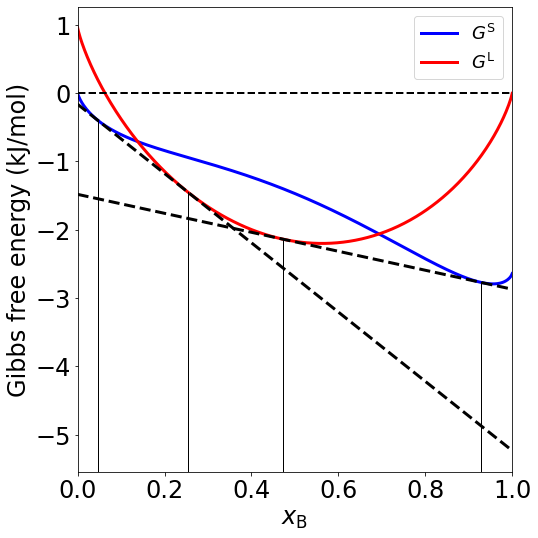

In [9]:
# High temperature equilibria between the liquid and the A-rich and B-rich phase at T = 400K
T = 460*u.K

G_S = get_G_S(T, xv)
G_L = get_G_L(T, xv)

# May need to ensure that we use a reasonable starting guess
x_S1, x_L1 =  fsolve(commontangent_solid_liquid, (0.04, 0.5))
mu_A_S1, mu_B_S1 = get_mu_S(T,x_S1)
mu_A_L1, mu_B_L1 = get_mu_L(T,x_L1)
print('Common tangent construction:')
display(Math(r' x_S^1 = {} \\ x_L^1 = {}'.format(round(x_S1,3), round(x_L1,3))))

x_S2, x_L2 =  fsolve(commontangent_solid_liquid, (0.96, 0.5))
mu_A_S2, mu_B_S2 = get_mu_S(T,x_S2)
mu_A_L2, mu_B_L2 = get_mu_L(T,x_L2)
print('Common tangent construction:')
display(Math(r' x_S^2 = {} \\ x_L^2 = {}'.format(round(x_S2,3), round(x_L2,3))))

# Plot Gibbs free energy for both phases
fig, ax = plt.subplots(1, 1, figsize=(8,8))
fig.tight_layout()

ax.plot(xv, (G_S/(u.kJ/u.mol)).magnitude, 'b-', linewidth=3.0, label='$G^\mathrm{S}$')
ax.plot(xv, (G_L/(u.kJ/u.mol)).magnitude, 'r-', linewidth=3.0, label='$G^\mathrm{L}$')
ax.plot([0, 1], [(mu_A_S1/(u.kJ/u.mol)).magnitude, (mu_B_S1/(u.kJ/u.mol)).magnitude], 'k--', linewidth=3.0)
ax.plot([0, 1], [(mu_A_S2/(u.kJ/u.mol)).magnitude, (mu_B_S2/(u.kJ/u.mol)).magnitude], 'k--', linewidth=3.0)
ax.plot([0, 1], [0, 0], 'k--', linewidth=2.0)

ymin, ymax = ax.get_ylim()
ax.plot([x_S1, x_S1], [(get_G_S(T, x_S1)/(u.kJ/u.mol)).magnitude, ymin], 'k-', linewidth=1.0)
ax.plot([x_L1, x_L1], [(get_G_L(T, x_L1)/(u.kJ/u.mol)).magnitude, ymin], 'k-', linewidth=1.0)
ax.plot([x_S2, x_S2], [(get_G_S(T, x_S2)/(u.kJ/u.mol)).magnitude, ymin], 'k-', linewidth=1.0)
ax.plot([x_L2, x_L2], [(get_G_L(T, x_L2)/(u.kJ/u.mol)).magnitude, ymin], 'k-', linewidth=1.0)


ax.set_xlim([0, 1])
ax.set_ylim([ymin, ymax])
ax.set_xlabel('$x_\mathrm{B}$')
ax.set_ylabel('Gibbs free energy (kJ/mol)')
ax.legend(prop={'size': 18})
fig.tight_layout()
plt.show()

### Calculation of the Eutectic Point

We need to optimize the temperature and the composition of the two solid and one liquid phase to determine the triple point corresponding to the eutectic reaction.

Common tangent construction:


<IPython.core.display.Math object>

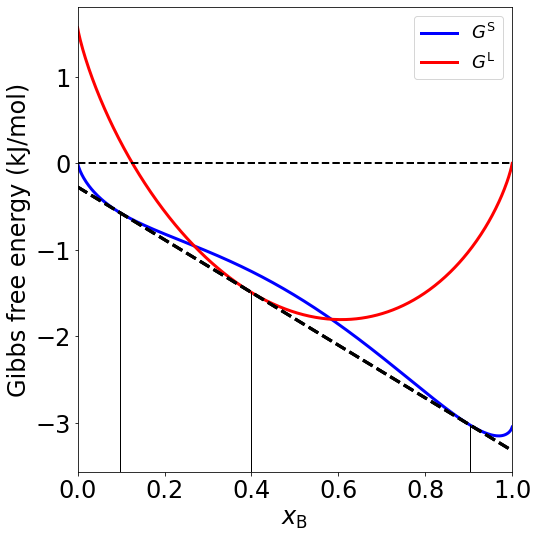

In [10]:
def commontangent_solid_liquid_solid(p):
    x_S1, x_L, x_S2, T = p
    T = T*u.K
    mu_A_S1, mu_B_S1 = get_mu_S(T,x_S1)
    mu_A_L, mu_B_L = get_mu_L(T,x_L)
    mu_A_S2, mu_B_S2 = get_mu_S(T,x_S2)
    return ((mu_A_S1-mu_A_L).magnitude, (mu_B_S1-mu_B_L).magnitude, (mu_A_S2-mu_A_L).magnitude, (mu_B_S2-mu_B_L).magnitude)

# May need to ensure that we use a reasonable starting guess
x_S1e, x_Le, x_S2e, Te = fsolve(commontangent_solid_liquid_solid, (0.1, 0.4, 0.9, 410))

T = Te*u.K
G_S = get_G_S(T, xv)
G_L = get_G_L(T, xv)

mu_A_S1, mu_B_S1 = get_mu_S(T,x_S1e)
mu_A_L,  mu_B_L  = get_mu_L(T,x_Le)
mu_A_S2, mu_B_S2 = get_mu_S(T,x_S2e)

print('Common tangent construction:')
display(Math(r' x_S^1 = {}\\ x_L = {}\\ x_S^2 = {}\\  T_e = {}K'.format(round(x_S1e,3),
        round(x_Le,3), round(x_S2e,3), round(Te,1))))

# Plot Gibbs free energy for both phases
fig, ax = plt.subplots(1, 1, figsize=(8,8))
fig.tight_layout()

ax.plot(xv, (G_S/(u.kJ/u.mol)).magnitude, 'b-', linewidth=3.0, label='$G^\mathrm{S}$')
ax.plot(xv, (G_L/(u.kJ/u.mol)).magnitude, 'r-', linewidth=3.0, label='$G^\mathrm{L}$')
ax.plot([0, 1], [(mu_A_S1/(u.kJ/u.mol)).magnitude, (mu_B_S1/(u.kJ/u.mol)).magnitude], 'k--', linewidth=3.0)
ax.plot([0, 1], [(mu_A_L/(u.kJ/u.mol)).magnitude, (mu_B_L/(u.kJ/u.mol)).magnitude], 'k--', linewidth=3.0)
ax.plot([0, 1], [(mu_A_S2/(u.kJ/u.mol)).magnitude, (mu_B_S2/(u.kJ/u.mol)).magnitude], 'k--', linewidth=3.0)
ax.plot([0, 1], [0, 0], 'k--', linewidth=2.0)

ymin, ymax = ax.get_ylim()
ax.plot([x_S1e, x_S1e], [(get_G_S(T, x_S1e)/(u.kJ/u.mol)).magnitude, ymin], 'k-', linewidth=1.0)
ax.plot([x_S2e, x_S2e], [(get_G_S(T, x_S2e)/(u.kJ/u.mol)).magnitude, ymin], 'k-', linewidth=1.0)
ax.plot([x_Le, x_Le], [(get_G_L(T, x_Le)/(u.kJ/u.mol)).magnitude, ymin], 'k-', linewidth=1.0)

ax.set_xlim([0, 1])
ax.set_ylim([ymin, ymax])
ax.set_xlabel('$x_\mathrm{B}$')
ax.set_ylabel('Gibbs free energy (kJ/mol)')
ax.legend(prop={'size': 18})
fig.tight_layout()
plt.show()

### Construction of Phase Diagram

We will need to consider four possible equilibria for this phase diagram
1) The triple point equilibrium between the liquid, and the A-rich and B-rich solid.
2) The equilbrium between the A-rich and B-rich phase of the regular solution model of the solid phase.
3) The equilbrium between the A-rich solid phase and the liquid.
) The equilbrium between the B-rich solid phase and the liquid.

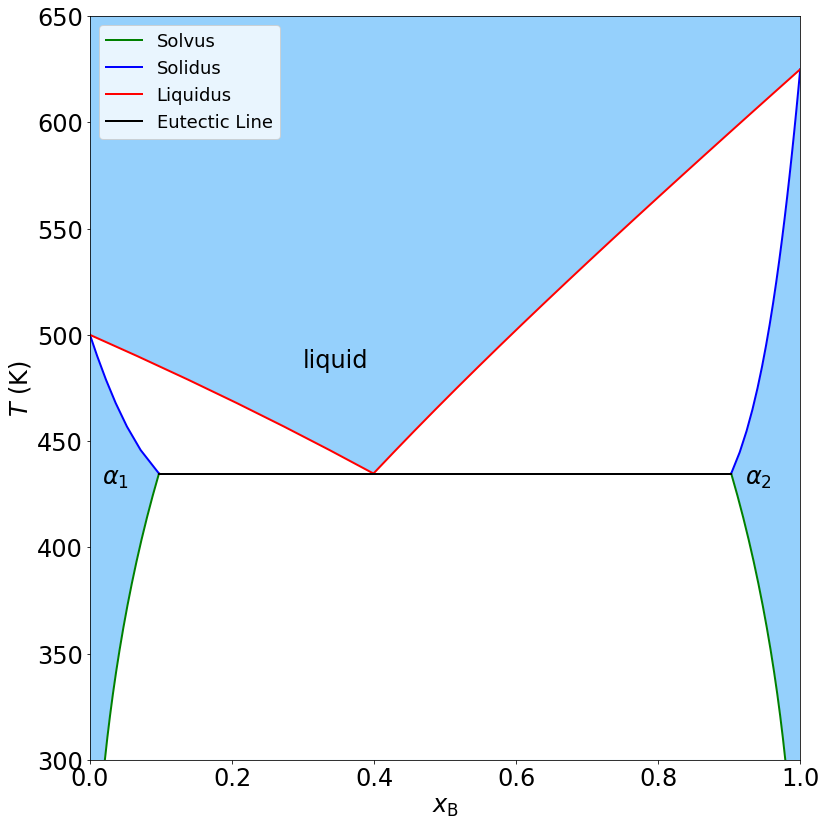

In [11]:
# 1) Consider the equilbrium between the A-rich and B-rich phase
#   of the regular solution model of the solid phase.

Tstep = 10

Tmin = 300
Tmax = Te
Npoints = int((Tmax - Tmin)/Tstep+1)
Tv = np.linspace(Tmax, Tmin, Npoints)*u.K
SolvusA = np.zeros(Npoints)
SolvusB = np.zeros(Npoints)
Temp = np.zeros(Npoints)

j=0
x1 = x_S1e
x2 = x_S2e
for i in range(Npoints):
    T = Tv[i]
    result =  fsolve(commontangent_solid_solid, (x1, x2), full_output=True)
    if result[2] in (1,2,3):
        x1, x2 = result[0]
        SolvusA[j], SolvusB[j] = result[0]
        Temp[j] = (T/u.K).magnitude
        j = j+1

SolvusA = np.resize(SolvusA, j)
SolvusB = np.resize(SolvusB, j)
Temp = np.resize(Temp, j)

xboundary, yboundary = np.hstack((SolvusA, SolvusB[::-1])), np.hstack((Temp, Temp[::-1]))

# Plot Phase Diagram
fig, ax = plt.subplots(1, 1, figsize=(12,12))
ax.set_facecolor('xkcd:light blue')

ax.plot(SolvusA, Temp, 'g-', linewidth=2.0, label='Solvus')
ax.plot(SolvusB, Temp, 'g-', linewidth=2.0)
ax.fill(xboundary, (yboundary/u.K).magnitude, color='w', alpha=1)

# 2) Consider the equilbrium between the A-rich solid and the liquid phase

# Set the temperature range ranging from the eutectic temperature to the melting point of pure A
Tmin = Te
Tmax = TmA/u.K-Tstep
Npoints = int((Tmax - Tmin)/Tstep+1)
Tv = np.linspace(Tmin, Tmax, Npoints)*u.K
Solidus = np.zeros(Npoints)
Liquidus = np.zeros(Npoints)
Temp = np.zeros(Npoints)

j=0
x1 = x_S1e
x2 = x_Le
for i in range(Npoints):
    T = Tv[i]
    result =  fsolve(commontangent_solid_liquid, (x1, x2), full_output=True)
    if result[2] in (1,2,3):
        x1, x2 = result[0]
        Solidus[j], Liquidus[j] = result[0]
        Temp[j] = (T/u.K).magnitude
        j = j+1

Solidus = np.resize(Solidus, j+1)
Liquidus = np.resize(Liquidus, j+1)
Temp = np.resize(Temp, j+1)
Solidus[j] = 0
Liquidus[j] = 0
Temp[j] = TmA/u.K

xboundary, yboundary = np.hstack((Liquidus, Solidus[::-1])), np.hstack((Temp, Temp[::-1]))

ax.plot(Solidus, Temp, 'b-', linewidth=2.0, label='Solidus')
ax.plot(Liquidus, Temp, 'r-', linewidth=2.0, label='Liquidus')
ax.fill(xboundary, (yboundary/u.K).magnitude, color='w', alpha=1)

# 3) Consider the equilbrium between the B-rich solid and the liquid phase

# Set the temperature range ranging from the eutectic temperature to the melting point of pure B
Tmin = Te
Tmax = TmB/u.K-Tstep
Npoints = int((Tmax - Tmin)/Tstep+1)
Tv = np.linspace(Tmin, Tmax, Npoints)*u.K
Solidus = np.zeros(Npoints)
Liquidus = np.zeros(Npoints)
Temp = np.zeros(Npoints)

j=0
x1 = x_Le
x2 = x_S2e
for i in range(Npoints):
    T = Tv[i]
    result =  fsolve(commontangent_solid_liquid, (x2, x1), full_output=True)
    if result[2] in (1,2,3):
        x2, x1 = result[0]
        Solidus[j], Liquidus[j] = result[0]
        Temp[j] = (T/u.K).magnitude
        j = j+1

Solidus = np.resize(Solidus, j+1)
Liquidus = np.resize(Liquidus, j+1)
Temp = np.resize(Temp, j+1)
Solidus[j] = 1
Liquidus[j] = 1
Temp[j] = TmB/u.K

xboundary, yboundary = np.hstack((Liquidus, Solidus[::-1])), np.hstack((Temp, Temp[::-1]))

# Plot Phase Diagram
#fig, ax = plt.subplots(1, 1, figsize=(8,8))

ax.plot(Solidus, Temp, 'b-', linewidth=2.0)
ax.plot(Liquidus, Temp, 'r-', linewidth=2.0)
ax.fill(xboundary, (yboundary/u.K).magnitude, color='w', alpha=1)

ax.plot([x_S1e, x_S2e], [Te, Te], 'k-', linewidth=2.0, label='Eutectic Line')

ax.annotate(r'$\alpha_1$', xy=(x_S1e-0.08,Te-5), color='k', xycoords='data', annotation_clip=False)
ax.annotate(r'$\alpha_2$', xy=(x_S2e+0.02,Te-5), color='k', xycoords='data', annotation_clip=False)
ax.annotate('liquid', xy=(x_Le-0.1,Te+50), color='k', xycoords='data', annotation_clip=False)

ax.set_xlim([0, 1])
ax.set_ylim([300, 650])
ax.set_xlabel('$x_\mathrm{B}$')
ax.set_ylabel('$T$ (K)')

ax.legend(prop={'size': 18})
fig.tight_layout()
plt.show()